# IMPORT LIBRARY & BUAT FOLDER DATASET AUGMENTASI

In [1]:
# Import library yang dibutuhkan
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
# Tentukan path dataset
dataset_path = r'D:\dataset_sampah_indonesia'
augmented_path = r'D:\dataset_sampah_indonesia_final'

# Buat folder baru untuk menyimpan gambar yang sudah di-augmentasi
if not os.path.exists(augmented_path):
    os.makedirs(augmented_path)
    print(f"Folder '{augmented_path}' berhasil dibuat.")
else:
    print(f"Folder '{augmented_path}' sudah ada.")

# Dapatkan daftar kategori (subfolder)
categories = os.listdir(dataset_path)
print("Kategori yang ditemukan:", categories)

# Tentukan jumlah target untuk penyeimbangan dataset
# Kita gunakan jumlah maksimal dari kategori yang sudah ada
max_images = 0
for category in categories:
    num_images = len(os.listdir(os.path.join(dataset_path, category)))
    if num_images > max_images:
        max_images = num_images

print(f"\nJumlah gambar target untuk setiap kategori: {max_images}")

Folder 'D:\dataset_sampah_indonesia_final' berhasil dibuat.
Kategori yang ditemukan: ['Anorganik_Kaca', 'Anorganik_Kardus', 'Anorganik_Kertas', 'Anorganik_Logam', 'Anorganik_Plastik', 'B3_Baterai', 'B3_Medis', 'Organik_Daun', 'Organik_Sisa_Makanan']

Jumlah gambar target untuk setiap kategori: 2269


# LOAD DATASET & TAMPILKAN GAMBAR


--- Menampilkan Gambar Sebelum Augmentasi ---


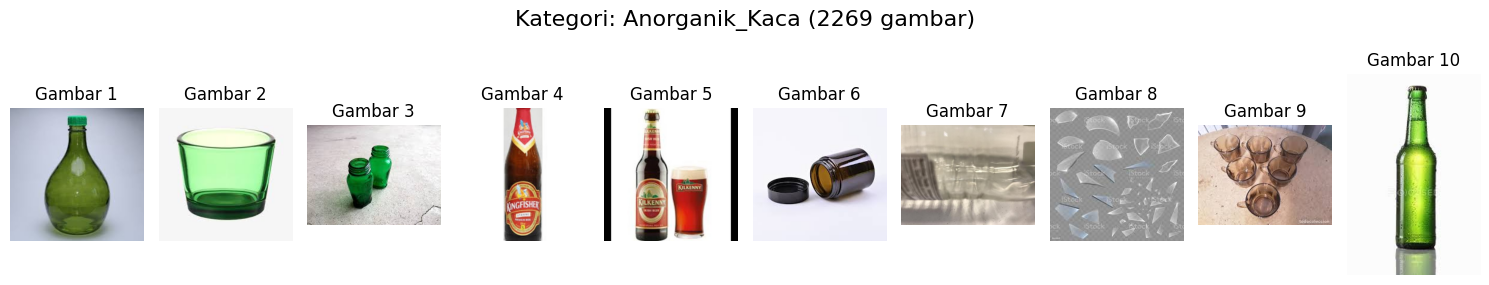

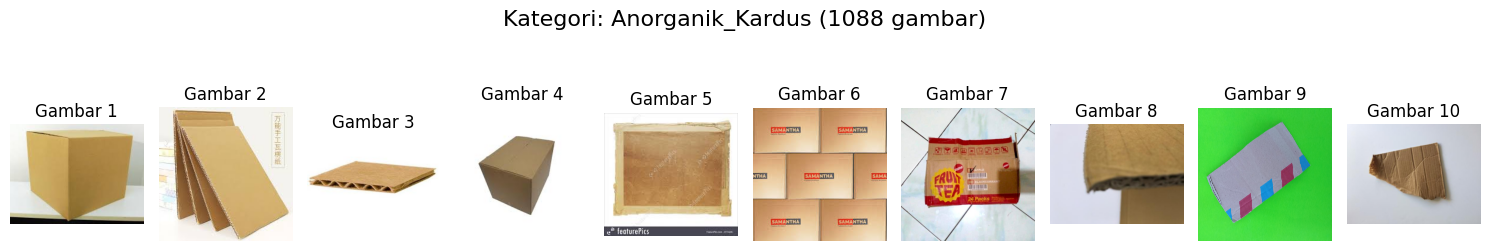

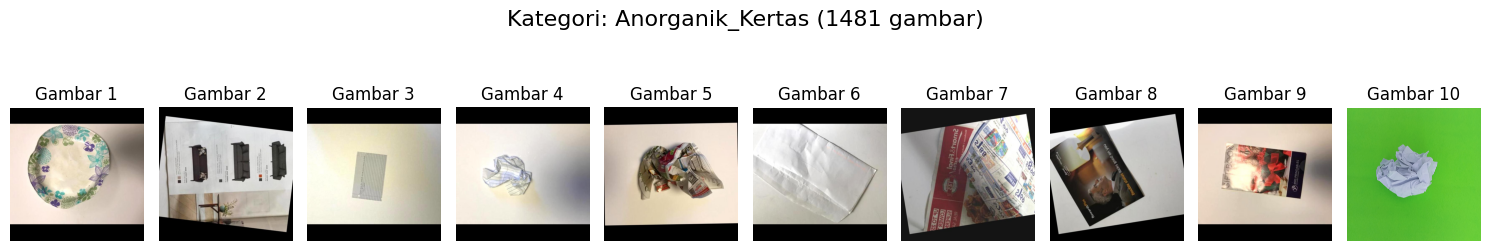

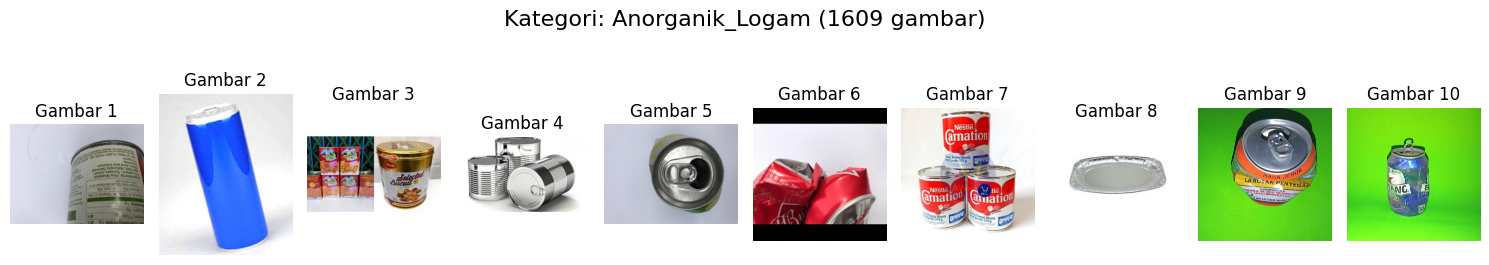

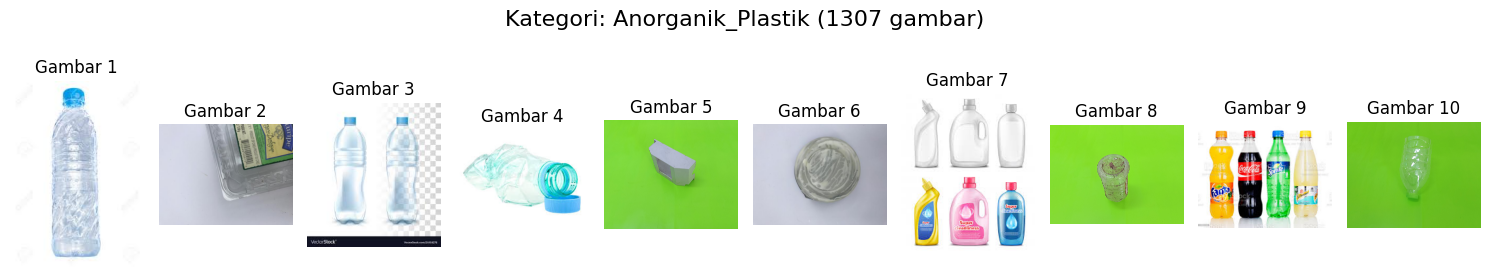

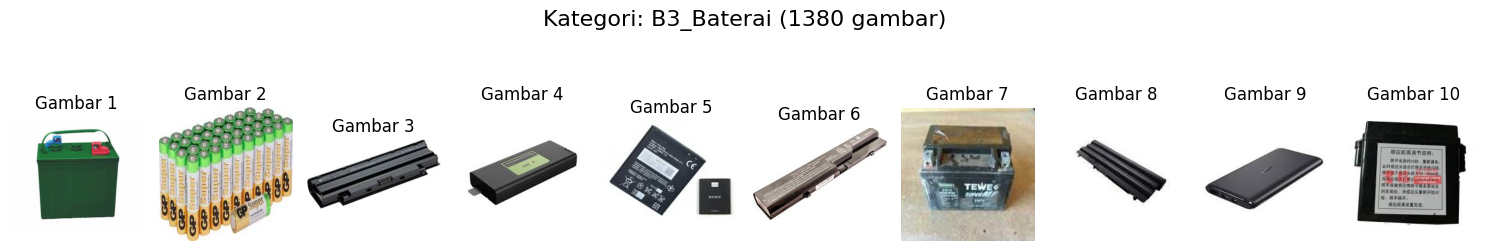

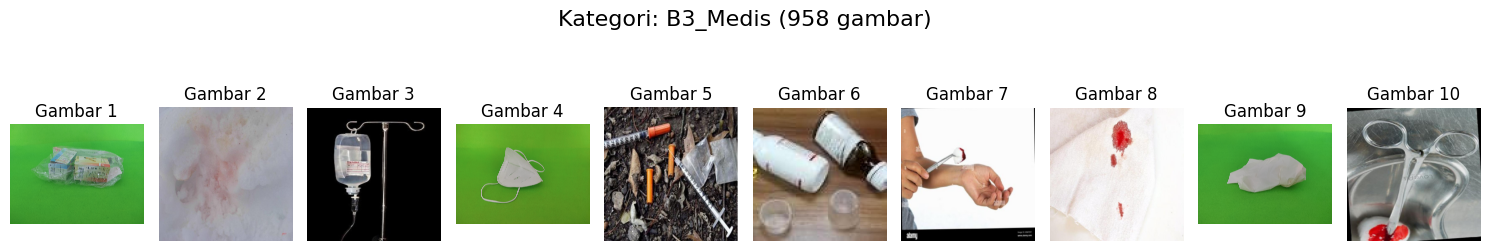

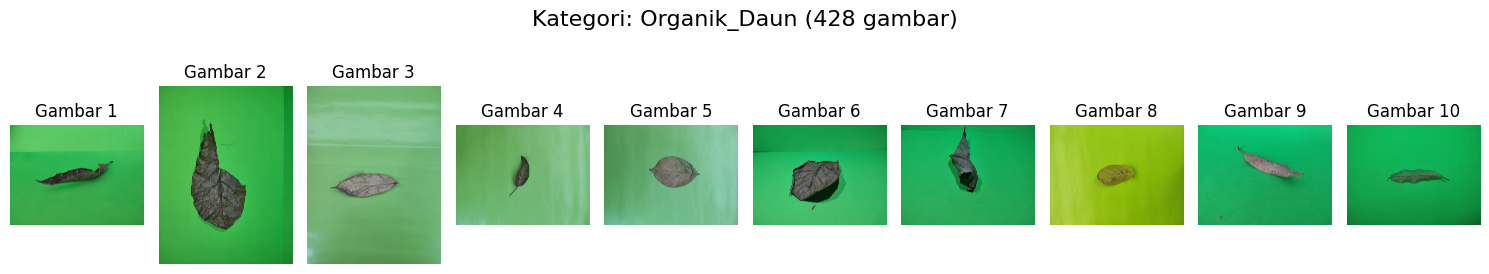

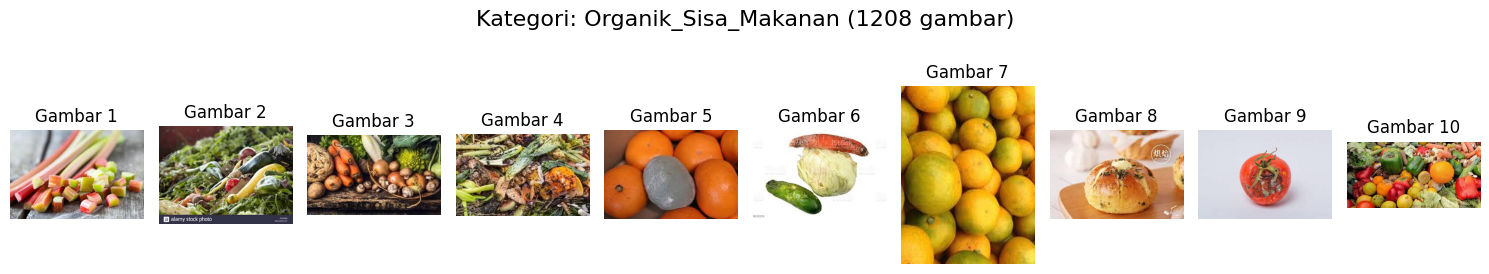

In [3]:
def display_images_per_category(base_path, categories, num_images=10):
    for category in categories:
        category_path = os.path.join(base_path, category)
        image_files = os.listdir(category_path)

        # Filter hanya file gambar
        image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.webp'))]
        
        # Ambil 10 gambar acak jika jumlah file lebih dari 10
        selected_images = random.sample(image_files, min(num_images, len(image_files)))
        
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Kategori: {category} ({len(image_files)} gambar)", fontsize=16)
        
        for i, img_file in enumerate(selected_images):
            img_path = os.path.join(category_path, img_file)
            try:
                img = Image.open(img_path)
                plt.subplot(1, num_images, i + 1)
                plt.imshow(img)
                plt.title(f"Gambar {i+1}")
                plt.axis('off')
            except Exception as e:
                print(f"Gagal memuat atau menampilkan {img_file}: {e}")
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Panggil fungsi untuk menampilkan gambar sebelum augmentasi
print("\n--- Menampilkan Gambar Sebelum Augmentasi ---")
display_images_per_category(dataset_path, categories)

# AUGMENTASI DATASET

In [4]:
print("\n--- Proses Augmentasi Dataset ---")

target_size = (640, 640)

datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for category in categories:
    original_cat_path = os.path.join(dataset_path, category)
    augmented_cat_path = os.path.join(augmented_path, category)
    
    if not os.path.exists(augmented_cat_path):
        os.makedirs(augmented_cat_path)

    image_files = [f for f in os.listdir(original_cat_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.webp'))]
    current_images = len(image_files)

    print(f"Memproses {category}: jumlah awal {current_images} gambar...")

    # Salin dan ubah ukuran gambar asli ke folder augmentasi
    for img_file in image_files:
        original_path = os.path.join(original_cat_path, img_file)
        file_name_without_ext = os.path.splitext(img_file)[0]
        augmented_path_file = os.path.join(augmented_cat_path, f"{file_name_without_ext}.jpeg")
        
        try:
            img = Image.open(original_path).convert('RGB').resize(target_size)
            img.save(augmented_path_file, 'JPEG')
        except Exception as e:
            print(f"Gagal menyalin, mengubah ukuran, atau mengkonversi {img_file}: {e}")
            continue

    # Lakukan augmentasi hanya jika jumlah gambar kurang dari target
    if current_images < max_images:
        images_to_generate = max_images - current_images
        print(f"   --> Melakukan augmentasi untuk {images_to_generate} gambar...")

        # Loop sampai jumlah file di folder augmentasi mencapai target
        while len(os.listdir(augmented_cat_path)) < max_images:
            try:
                img_file = random.choice(image_files)
                img_path = os.path.join(original_cat_path, img_file)

                img = load_img(img_path).convert('RGB').resize(target_size)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)
                
                gen = datagen.flow(x, batch_size=1, save_to_dir=augmented_cat_path, save_prefix='aug', save_format='jpeg')
                
                next(gen)
            except Exception as e:
                # Jika terjadi error, kita tidak akan menghentikan proses
                print(f"Gagal meng-augmentasi gambar: {e}")
                continue

print("\n--- Proses Augmentasi Selesai ---")

# Verifikasi hasil akhir
print("\n--- Verifikasi Jumlah Gambar Akhir ---")
for category in categories:
    augmented_cat_path = os.path.join(augmented_path, category)
    final_count = len(os.listdir(augmented_cat_path))
    print(f"Jumlah gambar di {category}: {final_count}")


--- Proses Augmentasi Dataset ---
Memproses Anorganik_Kaca: jumlah awal 2269 gambar...
Memproses Anorganik_Kardus: jumlah awal 1088 gambar...
   --> Melakukan augmentasi untuk 1181 gambar...
Memproses Anorganik_Kertas: jumlah awal 1481 gambar...
   --> Melakukan augmentasi untuk 788 gambar...
Memproses Anorganik_Logam: jumlah awal 1609 gambar...
   --> Melakukan augmentasi untuk 660 gambar...
Memproses Anorganik_Plastik: jumlah awal 1307 gambar...
   --> Melakukan augmentasi untuk 962 gambar...
Memproses B3_Baterai: jumlah awal 1380 gambar...
   --> Melakukan augmentasi untuk 889 gambar...
Memproses B3_Medis: jumlah awal 958 gambar...
   --> Melakukan augmentasi untuk 1311 gambar...
Memproses Organik_Daun: jumlah awal 428 gambar...
   --> Melakukan augmentasi untuk 1841 gambar...
Memproses Organik_Sisa_Makanan: jumlah awal 1208 gambar...
   --> Melakukan augmentasi untuk 1061 gambar...

--- Proses Augmentasi Selesai ---

--- Verifikasi Jumlah Gambar Akhir ---
Jumlah gambar di Anorgani

# UBAH NAMA FILE & KONVERSI LABEL

In [1]:
# FILE JPG & TXT DARI JENIS SAMPAH ANOGANIK KACA (0)

import os
from natsort import natsorted

# Folder dataset
images_path = r"D:\\dataset_sampah_indonesia\\anorganik_kaca\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\anorganik_kaca\\labels"

# Ambil daftar file
image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith(('.jpg'))])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

# Cek jumlah file
if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"kaca{idx:04d}"

        # Rename gambar
        img_ext = os.path.splitext(img_file)[1]
        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))

        # Rename label
        lbl_ext = os.path.splitext(lbl_file)[1]
        os.rename(os.path.join(labels_path, lbl_file), os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar dan label sudah di-rename rapi.")

kaca0001.jpg + kaca0001.txt → kaca0001.jpg + kaca0001.txt
kaca0002.jpg + kaca0002.txt → kaca0002.jpg + kaca0002.txt
kaca0003.jpg + kaca0003.txt → kaca0003.jpg + kaca0003.txt
kaca0004.jpg + kaca0004.txt → kaca0004.jpg + kaca0004.txt
kaca0005.jpg + kaca0005.txt → kaca0005.jpg + kaca0005.txt
kaca0006.jpg + kaca0006.txt → kaca0006.jpg + kaca0006.txt
kaca0007.jpg + kaca0007.txt → kaca0007.jpg + kaca0007.txt
kaca0008.jpg + kaca0008.txt → kaca0008.jpg + kaca0008.txt
kaca0009.jpg + kaca0009.txt → kaca0009.jpg + kaca0009.txt
kaca0010.jpg + kaca0010.txt → kaca0010.jpg + kaca0010.txt
kaca0011.jpg + kaca0011.txt → kaca0011.jpg + kaca0011.txt
kaca0012.jpg + kaca0012.txt → kaca0012.jpg + kaca0012.txt
kaca0013.jpg + kaca0013.txt → kaca0013.jpg + kaca0013.txt
kaca0014.jpg + kaca0014.txt → kaca0014.jpg + kaca0014.txt
kaca0015.jpg + kaca0015.txt → kaca0015.jpg + kaca0015.txt
kaca0016.jpg + kaca0016.txt → kaca0016.jpg + kaca0016.txt
kaca0017.jpg + kaca0017.txt → kaca0017.jpg + kaca0017.txt
kaca0018.jpg +

In [2]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH ANORGANIK KACA (0)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\anorganik_kaca\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2254
File yang berhasil dikonversi dari polygon ke bbox: 0
File yang tidak berubah (sudah bbox): 2254


In [3]:
# FILE JPG & TXT DARI JENIS SAMPAH ANOGANIK KARDUS (1)

import os
from natsort import natsorted

images_path = r"D:\\dataset_sampah_indonesia\\anorganik_kardus\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\anorganik_kardus\\labels"

image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith('.jpg')])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"kardus{idx:04d}"

        # --- Update isi file txt dulu ---
        lbl_path = os.path.join(labels_path, lbl_file)
        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            if line.strip() == "":
                continue
            parts = line.strip().split()
            parts[0] = "1"  # ganti index pertama jadi 1
            new_lines.append(" ".join(parts) + "\n")

        # Tulis ulang isi file txt (overwrite file lama)
        with open(lbl_path, 'w') as f:
            f.writelines(new_lines)

        # --- Rename file gambar & label ---
        img_ext = os.path.splitext(img_file)[1]
        lbl_ext = os.path.splitext(lbl_file)[1]

        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))
        os.rename(lbl_path, os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar & label sudah di-rename dan index class diubah menjadi 1.")

kardus0001.jpg + kardus0001.txt → kardus0001.jpg + kardus0001.txt
kardus0002.jpg + kardus0002.txt → kardus0002.jpg + kardus0002.txt
kardus0003.jpg + kardus0003.txt → kardus0003.jpg + kardus0003.txt
kardus0004.jpg + kardus0004.txt → kardus0004.jpg + kardus0004.txt
kardus0005.jpg + kardus0005.txt → kardus0005.jpg + kardus0005.txt
kardus0006.jpg + kardus0006.txt → kardus0006.jpg + kardus0006.txt
kardus0007.jpg + kardus0007.txt → kardus0007.jpg + kardus0007.txt
kardus0008.jpg + kardus0008.txt → kardus0008.jpg + kardus0008.txt
kardus0009.jpg + kardus0009.txt → kardus0009.jpg + kardus0009.txt
kardus0010.jpg + kardus0010.txt → kardus0010.jpg + kardus0010.txt
kardus0011.jpg + kardus0011.txt → kardus0011.jpg + kardus0011.txt
kardus0012.jpg + kardus0012.txt → kardus0012.jpg + kardus0012.txt
kardus0013.jpg + kardus0013.txt → kardus0013.jpg + kardus0013.txt
kardus0014.jpg + kardus0014.txt → kardus0014.jpg + kardus0014.txt
kardus0015.jpg + kardus0015.txt → kardus0015.jpg + kardus0015.txt
kardus0016

In [4]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH ANORGANIK KARDUS (1)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\anorganik_kardus\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2269
File yang berhasil dikonversi dari polygon ke bbox: 34
File yang tidak berubah (sudah bbox): 2235


In [5]:
# FILE JPG & TXT DARI JENIS SAMPAH ANOGANIK KERTAS (2)

import os
from natsort import natsorted

images_path = r"D:\\dataset_sampah_indonesia\\anorganik_kertas\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\anorganik_kertas\\labels"

image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith('.jpg')])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"kertas{idx:04d}"

        # --- Update isi file txt dulu ---
        lbl_path = os.path.join(labels_path, lbl_file)
        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            if line.strip() == "":
                continue
            parts = line.strip().split()
            parts[0] = "2"  # ganti index pertama jadi 2
            new_lines.append(" ".join(parts) + "\n")

        # Tulis ulang isi file txt (overwrite file lama)
        with open(lbl_path, 'w') as f:
            f.writelines(new_lines)

        # --- Rename file gambar & label ---
        img_ext = os.path.splitext(img_file)[1]
        lbl_ext = os.path.splitext(lbl_file)[1]

        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))
        os.rename(lbl_path, os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar & label sudah di-rename dan index class diubah menjadi 2.")

kertas0001.jpg + kertas0001.txt → kertas0001.jpg + kertas0001.txt
kertas0002.jpg + kertas0002.txt → kertas0002.jpg + kertas0002.txt
kertas0003.jpg + kertas0003.txt → kertas0003.jpg + kertas0003.txt
kertas0004.jpg + kertas0004.txt → kertas0004.jpg + kertas0004.txt
kertas0005.jpg + kertas0005.txt → kertas0005.jpg + kertas0005.txt
kertas0006.jpg + kertas0006.txt → kertas0006.jpg + kertas0006.txt
kertas0007.jpg + kertas0007.txt → kertas0007.jpg + kertas0007.txt
kertas0008.jpg + kertas0008.txt → kertas0008.jpg + kertas0008.txt
kertas0009.jpg + kertas0009.txt → kertas0009.jpg + kertas0009.txt
kertas0010.jpg + kertas0010.txt → kertas0010.jpg + kertas0010.txt
kertas0011.jpg + kertas0011.txt → kertas0011.jpg + kertas0011.txt
kertas0012.jpg + kertas0012.txt → kertas0012.jpg + kertas0012.txt
kertas0013.jpg + kertas0013.txt → kertas0013.jpg + kertas0013.txt
kertas0014.jpg + kertas0014.txt → kertas0014.jpg + kertas0014.txt
kertas0015.jpg + kertas0015.txt → kertas0015.jpg + kertas0015.txt
kertas0016

In [6]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH ANORGANIK KERTAS (2)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\anorganik_kertas\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2268
File yang berhasil dikonversi dari polygon ke bbox: 0
File yang tidak berubah (sudah bbox): 2268


In [7]:
# FILE JPG & TXT DARI JENIS SAMPAH ANOGANIK LOGAM (3)

import os
from natsort import natsorted

images_path = r"D:\\dataset_sampah_indonesia\\anorganik_logam\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\anorganik_logam\\labels"

image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith('.jpg')])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"logam{idx:04d}"

        # --- Update isi file txt dulu ---
        lbl_path = os.path.join(labels_path, lbl_file)
        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            if line.strip() == "":
                continue
            parts = line.strip().split()
            parts[0] = "3"  # ganti index pertama jadi 3
            new_lines.append(" ".join(parts) + "\n")

        # Tulis ulang isi file txt (overwrite file lama)
        with open(lbl_path, 'w') as f:
            f.writelines(new_lines)

        # --- Rename file gambar & label ---
        img_ext = os.path.splitext(img_file)[1]
        lbl_ext = os.path.splitext(lbl_file)[1]

        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))
        os.rename(lbl_path, os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar & label sudah di-rename dan index class diubah menjadi 3.")

logam0001.jpg + logam0001.txt → logam0001.jpg + logam0001.txt
logam0002.jpg + logam0002.txt → logam0002.jpg + logam0002.txt
logam0003.jpg + logam0003.txt → logam0003.jpg + logam0003.txt
logam0004.jpg + logam0004.txt → logam0004.jpg + logam0004.txt
logam0005.jpg + logam0005.txt → logam0005.jpg + logam0005.txt
logam0006.jpg + logam0006.txt → logam0006.jpg + logam0006.txt
logam0007.jpg + logam0007.txt → logam0007.jpg + logam0007.txt
logam0008.jpg + logam0008.txt → logam0008.jpg + logam0008.txt
logam0009.jpg + logam0009.txt → logam0009.jpg + logam0009.txt
logam0010.jpg + logam0010.txt → logam0010.jpg + logam0010.txt
logam0011.jpg + logam0011.txt → logam0011.jpg + logam0011.txt
logam0012.jpg + logam0012.txt → logam0012.jpg + logam0012.txt
logam0013.jpg + logam0013.txt → logam0013.jpg + logam0013.txt
logam0014.jpg + logam0014.txt → logam0014.jpg + logam0014.txt
logam0015.jpg + logam0015.txt → logam0015.jpg + logam0015.txt
logam0016.jpg + logam0016.txt → logam0016.jpg + logam0016.txt
logam001

In [8]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH ANORGANIK LOGAM (3)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\anorganik_logam\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2269
File yang berhasil dikonversi dari polygon ke bbox: 38
File yang tidak berubah (sudah bbox): 2231


In [9]:
# FILE JPG & TXT DARI JENIS SAMPAH ANOGANIK PLASTIK (4)

import os
from natsort import natsorted

images_path = r"D:\\dataset_sampah_indonesia\\anorganik_plastik\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\anorganik_plastik\\labels"

image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith('.jpg')])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"plastik{idx:04d}"

        # --- Update isi file txt dulu ---
        lbl_path = os.path.join(labels_path, lbl_file)
        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            if line.strip() == "":
                continue
            parts = line.strip().split()
            parts[0] = "4"  # ganti index pertama jadi 4
            new_lines.append(" ".join(parts) + "\n")

        # Tulis ulang isi file txt (overwrite file lama)
        with open(lbl_path, 'w') as f:
            f.writelines(new_lines)

        # --- Rename file gambar & label ---
        img_ext = os.path.splitext(img_file)[1]
        lbl_ext = os.path.splitext(lbl_file)[1]

        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))
        os.rename(lbl_path, os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar & label sudah di-rename dan index class diubah menjadi 4.")

plastik0001.jpg + plastik0001.txt → plastik0001.jpg + plastik0001.txt
plastik0002.jpg + plastik0002.txt → plastik0002.jpg + plastik0002.txt
plastik0003.jpg + plastik0003.txt → plastik0003.jpg + plastik0003.txt
plastik0004.jpg + plastik0004.txt → plastik0004.jpg + plastik0004.txt
plastik0005.jpg + plastik0005.txt → plastik0005.jpg + plastik0005.txt
plastik0006.jpg + plastik0006.txt → plastik0006.jpg + plastik0006.txt
plastik0007.jpg + plastik0007.txt → plastik0007.jpg + plastik0007.txt
plastik0008.jpg + plastik0008.txt → plastik0008.jpg + plastik0008.txt
plastik0009.jpg + plastik0009.txt → plastik0009.jpg + plastik0009.txt
plastik0010.jpg + plastik0010.txt → plastik0010.jpg + plastik0010.txt
plastik0011.jpg + plastik0011.txt → plastik0011.jpg + plastik0011.txt
plastik0012.jpg + plastik0012.txt → plastik0012.jpg + plastik0012.txt
plastik0013.jpg + plastik0013.txt → plastik0013.jpg + plastik0013.txt
plastik0014.jpg + plastik0014.txt → plastik0014.jpg + plastik0014.txt
plastik0015.jpg + pl

In [10]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH ANORGANIK PLASTIK (4)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\anorganik_plastik\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2261
File yang berhasil dikonversi dari polygon ke bbox: 16
File yang tidak berubah (sudah bbox): 2245


In [11]:
# FILE JPG & TXT DARI JENIS SAMPAH B3 BATERAI (5)

import os
from natsort import natsorted

images_path = r"D:\\dataset_sampah_indonesia\\b3_baterai\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\b3_baterai\\labels"

image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith('.jpg')])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"baterai{idx:04d}"

        # --- Update isi file txt dulu ---
        lbl_path = os.path.join(labels_path, lbl_file)
        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            if line.strip() == "":
                continue
            parts = line.strip().split()
            parts[0] = "5"  # ganti index pertama jadi 5
            new_lines.append(" ".join(parts) + "\n")

        # Tulis ulang isi file txt (overwrite file lama)
        with open(lbl_path, 'w') as f:
            f.writelines(new_lines)

        # --- Rename file gambar & label ---
        img_ext = os.path.splitext(img_file)[1]
        lbl_ext = os.path.splitext(lbl_file)[1]

        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))
        os.rename(lbl_path, os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar & label sudah di-rename dan index class diubah menjadi 5.")

baterai0001.jpg + baterai0001.txt → baterai0001.jpg + baterai0001.txt
baterai0002.jpg + baterai0002.txt → baterai0002.jpg + baterai0002.txt
baterai0003.jpg + baterai0003.txt → baterai0003.jpg + baterai0003.txt
baterai0004.jpg + baterai0004.txt → baterai0004.jpg + baterai0004.txt
baterai0005.jpg + baterai0005.txt → baterai0005.jpg + baterai0005.txt
baterai0006.jpg + baterai0006.txt → baterai0006.jpg + baterai0006.txt
baterai0007.jpg + baterai0007.txt → baterai0007.jpg + baterai0007.txt
baterai0008.jpg + baterai0008.txt → baterai0008.jpg + baterai0008.txt
baterai0009.jpg + baterai0009.txt → baterai0009.jpg + baterai0009.txt
baterai0010.jpg + baterai0010.txt → baterai0010.jpg + baterai0010.txt
baterai0011.jpg + baterai0011.txt → baterai0011.jpg + baterai0011.txt
baterai0012.jpg + baterai0012.txt → baterai0012.jpg + baterai0012.txt
baterai0013.jpg + baterai0013.txt → baterai0013.jpg + baterai0013.txt
baterai0014.jpg + baterai0014.txt → baterai0014.jpg + baterai0014.txt
baterai0015.jpg + ba

In [12]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH B3 BATERAI (5)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\b3_baterai\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2269
File yang berhasil dikonversi dari polygon ke bbox: 0
File yang tidak berubah (sudah bbox): 2269


In [13]:
# FILE JPG & TXT DARI JENIS SAMPAH B3 MEDIS (6)

import os
from natsort import natsorted

images_path = r"D:\\dataset_sampah_indonesia\\b3_medis\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\b3_medis\\labels"

image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith('.jpg')])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"medis{idx:04d}"

        # --- Update isi file txt dulu ---
        lbl_path = os.path.join(labels_path, lbl_file)
        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            if line.strip() == "":
                continue
            parts = line.strip().split()
            parts[0] = "6"  # ganti index pertama jadi 6
            new_lines.append(" ".join(parts) + "\n")

        # Tulis ulang isi file txt (overwrite file lama)
        with open(lbl_path, 'w') as f:
            f.writelines(new_lines)

        # --- Rename file gambar & label ---
        img_ext = os.path.splitext(img_file)[1]
        lbl_ext = os.path.splitext(lbl_file)[1]

        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))
        os.rename(lbl_path, os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar & label sudah di-rename dan index class diubah menjadi 6.")

medis0001.jpg + medis0001.txt → medis0001.jpg + medis0001.txt
medis0002.jpg + medis0002.txt → medis0002.jpg + medis0002.txt
medis0003.jpg + medis0003.txt → medis0003.jpg + medis0003.txt
medis0004.jpg + medis0004.txt → medis0004.jpg + medis0004.txt
medis0005.jpg + medis0005.txt → medis0005.jpg + medis0005.txt
medis0006.jpg + medis0006.txt → medis0006.jpg + medis0006.txt
medis0007.jpg + medis0007.txt → medis0007.jpg + medis0007.txt
medis0008.jpg + medis0008.txt → medis0008.jpg + medis0008.txt
medis0009.jpg + medis0009.txt → medis0009.jpg + medis0009.txt
medis0010.jpg + medis0010.txt → medis0010.jpg + medis0010.txt
medis0011.jpg + medis0011.txt → medis0011.jpg + medis0011.txt
medis0012.jpg + medis0012.txt → medis0012.jpg + medis0012.txt
medis0013.jpg + medis0013.txt → medis0013.jpg + medis0013.txt
medis0014.jpg + medis0014.txt → medis0014.jpg + medis0014.txt
medis0015.jpg + medis0015.txt → medis0015.jpg + medis0015.txt
medis0016.jpg + medis0016.txt → medis0016.jpg + medis0016.txt
medis001

In [14]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH B3 MEDIS (6)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\b3_medis\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2250
File yang berhasil dikonversi dari polygon ke bbox: 123
File yang tidak berubah (sudah bbox): 2127


In [15]:
# FILE JPG & TXT DARI JENIS SAMPAH ORGANIK DAUN (7)

import os
from natsort import natsorted

images_path = r"D:\\dataset_sampah_indonesia\\organik_daun\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\organik_daun\\labels"

image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith('.jpg')])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"daun{idx:04d}"

        # --- Update isi file txt dulu ---
        lbl_path = os.path.join(labels_path, lbl_file)
        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            if line.strip() == "":
                continue
            parts = line.strip().split()
            parts[0] = "7"  # ganti index pertama jadi 7
            new_lines.append(" ".join(parts) + "\n")

        # Tulis ulang isi file txt (overwrite file lama)
        with open(lbl_path, 'w') as f:
            f.writelines(new_lines)

        # --- Rename file gambar & label ---
        img_ext = os.path.splitext(img_file)[1]
        lbl_ext = os.path.splitext(lbl_file)[1]

        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))
        os.rename(lbl_path, os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar & label sudah di-rename dan index class diubah menjadi 7.")

daun0001.jpg + daun0001.txt → daun0001.jpg + daun0001.txt
daun0002.jpg + daun0002.txt → daun0002.jpg + daun0002.txt
daun0003.jpg + daun0003.txt → daun0003.jpg + daun0003.txt
daun0004.jpg + daun0004.txt → daun0004.jpg + daun0004.txt
daun0005.jpg + daun0005.txt → daun0005.jpg + daun0005.txt
daun0006.jpg + daun0006.txt → daun0006.jpg + daun0006.txt
daun0007.jpg + daun0007.txt → daun0007.jpg + daun0007.txt
daun0008.jpg + daun0008.txt → daun0008.jpg + daun0008.txt
daun0009.jpg + daun0009.txt → daun0009.jpg + daun0009.txt
daun0010.jpg + daun0010.txt → daun0010.jpg + daun0010.txt
daun0011.jpg + daun0011.txt → daun0011.jpg + daun0011.txt
daun0012.jpg + daun0012.txt → daun0012.jpg + daun0012.txt
daun0013.jpg + daun0013.txt → daun0013.jpg + daun0013.txt
daun0014.jpg + daun0014.txt → daun0014.jpg + daun0014.txt
daun0015.jpg + daun0015.txt → daun0015.jpg + daun0015.txt
daun0016.jpg + daun0016.txt → daun0016.jpg + daun0016.txt
daun0017.jpg + daun0017.txt → daun0017.jpg + daun0017.txt
daun0018.jpg +

In [16]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH ORGANIK DAUN (7)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\organik_daun\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2269
File yang berhasil dikonversi dari polygon ke bbox: 0
File yang tidak berubah (sudah bbox): 2269


In [ ]:
# FILE JPG & TXT DARI JENIS SAMPAH ORGANIK SISA MAKANAN (8)

import os
from natsort import natsorted

images_path = r"D:\\dataset_sampah_indonesia\\organik_sisa_makanan\\images"
labels_path = r"D:\\dataset_sampah_indonesia\\organik_sisa_makanan\\labels"

image_files = natsorted([f for f in os.listdir(images_path) if f.lower().endswith('.jpg')])
label_files = natsorted([f for f in os.listdir(labels_path) if f.endswith('.txt')])

if len(image_files) != len(label_files):
    print(f"⚠️ Jumlah gambar ({len(image_files)}) ≠ label ({len(label_files)})")
else:
    for idx, (img_file, lbl_file) in enumerate(zip(image_files, label_files), start=1):
        new_name = f"sisa_makanan{idx:04d}"

        # --- Update isi file txt dulu ---
        lbl_path = os.path.join(labels_path, lbl_file)
        with open(lbl_path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            if line.strip() == "":
                continue
            parts = line.strip().split()
            parts[0] = "8"  # ganti index pertama jadi 8
            new_lines.append(" ".join(parts) + "\n")

        # Tulis ulang isi file txt (overwrite file lama)
        with open(lbl_path, 'w') as f:
            f.writelines(new_lines)

        # --- Rename file gambar & label ---
        img_ext = os.path.splitext(img_file)[1]
        lbl_ext = os.path.splitext(lbl_file)[1]

        os.rename(os.path.join(images_path, img_file), os.path.join(images_path, new_name + img_ext))
        os.rename(lbl_path, os.path.join(labels_path, new_name + lbl_ext))

        print(f"{img_file} + {lbl_file} → {new_name}{img_ext} + {new_name}{lbl_ext}")

    print("✅ Semua file gambar & label sudah di-rename dan index class diubah menjadi 8.")

sisa_makanan0001.jpg + sisa_makanan0001.txt → sisa_makanan0001.jpg + sisa_makanan0001.txt
sisa_makanan0002.jpg + sisa_makanan0002.txt → sisa_makanan0002.jpg + sisa_makanan0002.txt
sisa_makanan0003.jpg + sisa_makanan0003.txt → sisa_makanan0003.jpg + sisa_makanan0003.txt
sisa_makanan0004.jpg + sisa_makanan0004.txt → sisa_makanan0004.jpg + sisa_makanan0004.txt
sisa_makanan0005.jpg + sisa_makanan0005.txt → sisa_makanan0005.jpg + sisa_makanan0005.txt
sisa_makanan0006.jpg + sisa_makanan0006.txt → sisa_makanan0006.jpg + sisa_makanan0006.txt
sisa_makanan0007.jpg + sisa_makanan0007.txt → sisa_makanan0007.jpg + sisa_makanan0007.txt
sisa_makanan0008.jpg + sisa_makanan0008.txt → sisa_makanan0008.jpg + sisa_makanan0008.txt
sisa_makanan0009.jpg + sisa_makanan0009.txt → sisa_makanan0009.jpg + sisa_makanan0009.txt
sisa_makanan0010.jpg + sisa_makanan0010.txt → sisa_makanan0010.jpg + sisa_makanan0010.txt
sisa_makanan0011.jpg + sisa_makanan0011.txt → sisa_makanan0011.jpg + sisa_makanan0011.txt
sisa_makan

In [18]:
# KONVERSI POLYGON KE BOUNDING BOX PADA FILE LABEL SAMPAH ORGANIK SISA MAKANAN (8)

import os

def polygon_to_bbox(coords):
    xs = coords[0::2]
    ys = coords[1::2]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    cx = (min_x + max_x) / 2
    cy = (min_y + max_y) / 2
    w = max_x - min_x
    h = max_y - min_y
    return [cx, cy, w, h]

label_dir = r"D:\\dataset_sampah_indonesia\\organik_sisa_makanan\\labels" # ganti dengan path label

total_files = 0
modified_files = 0

for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        total_files += 1
        new_lines = []
        changed = False
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = parts[0]
                nums = list(map(float, parts[1:]))
                if len(nums) > 4:  # berarti polygon
                    bbox = polygon_to_bbox(nums)
                    new_line = f"{cls} " + " ".join(map(str, bbox))
                    changed = True
                else:  # sudah bbox
                    new_line = line.strip()
                new_lines.append(new_line)
        # simpan lagi
        with open(os.path.join(label_dir, file), "w") as f:
            f.write("\n".join(new_lines))
        if changed:
            modified_files += 1

print(f"Total file label: {total_files}")
print(f"File yang berhasil dikonversi dari polygon ke bbox: {modified_files}")
print(f"File yang tidak berubah (sudah bbox): {total_files - modified_files}")

Total file label: 2267
File yang berhasil dikonversi dari polygon ke bbox: 5
File yang tidak berubah (sudah bbox): 2262


# SPLIT DATA PEMBUATAN DATA.YAML

In [19]:
# PEMBUATAN DATASET FINAL (TRAIN, TEST, VALID)

import os
import shutil
import random
from glob import glob

# Dataset sumber (hasil penggabungan sebelumnya)
source_base = r"D:\\dataset_sampah_indonesia"

# Dataset akhir
final_base = r"D:\\indonesian_waste_dataset"

# Struktur folder target
splits = ["train", "valid", "test"]
for split in splits:
    os.makedirs(os.path.join(final_base, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(final_base, split, "labels"), exist_ok=True)

# Buat pembagian dataset per kelas
for class_name in os.listdir(source_base):
    class_path = os.path.join(source_base, class_name)
    images = glob(os.path.join(class_path, "images", "*.jpg")) + \
             glob(os.path.join(class_path, "images", "*.png")) + \
             glob(os.path.join(class_path, "images", "*.jpeg"))

    # acak supaya tidak bias
    random.shuffle(images)

    total = len(images)
    train_split = int(0.7 * total)
    valid_split = int(0.9 * total)  # sisanya 10% untuk test

    train_imgs = images[:train_split]
    valid_imgs = images[train_split:valid_split]
    test_imgs  = images[valid_split:]

    def copy_data(img_list, split):
        for img_path in img_list:
            base_name = os.path.splitext(os.path.basename(img_path))[0]
            lbl_path = os.path.join(class_path, "labels", base_name + ".txt")
            if not os.path.exists(lbl_path):
                continue

            # tujuan
            dst_img = os.path.join(final_base, split, "images", os.path.basename(img_path))
            dst_lbl = os.path.join(final_base, split, "labels", os.path.basename(lbl_path))

            shutil.copy(img_path, dst_img)
            shutil.copy(lbl_path, dst_lbl)

    # copy semua data ke folder final
    copy_data(train_imgs, "train")
    copy_data(valid_imgs, "valid")
    copy_data(test_imgs, "test")

print("Dataset berhasil dibuat ke folder indonesian_waste_dataset ✅")

Dataset berhasil dibuat ke folder indonesian_waste_dataset ✅


In [20]:
# PEMBUATAN FILE data.yaml

import os
import yaml

# Dataset final
final_base = r"D:\\indonesian_waste_dataset"

# Ambil semua label unik dari file .txt di train/labels
label_dir = os.path.join(final_base, "train", "labels")

all_labels = set()
for file in os.listdir(label_dir):
    if file.endswith(".txt"):
        with open(os.path.join(label_dir, file), "r") as f:
            for line in f:
                if line.strip():
                    cls_id = int(line.split()[0])  # ambil angka kelas (0, 1, 2, ...)
                    all_labels.add(cls_id)

# Urutkan biar konsisten
class_ids = sorted(list(all_labels))

# Mapping id ke nama kelas sesuai urutan yang dipakai saat membuat label
class_names = {
    0: "Anorganik_Kaca",
    1: "Anorganik_Kardus",
    2: "Anorganik_Kertas",
    3: "Anorganik_Logam",
    4: "Anorganik_Plastik",
    5: "B3_Baterai",
    6: "B3_Medis",
    7: "Organik_Daun",
    8: "Organik_Sisa_Makanan"
}

# Buat data.yaml
data_config = {
    "train": os.path.join(final_base, "train", "images"),
    "val": os.path.join(final_base, "valid", "images"),
    "test": os.path.join(final_base, "test", "images"),
    "nc": len(class_ids),
    "names": [class_names[i] for i in class_ids]
}

# Simpan ke file DI DALAM folder indonesian_waste_dataset
yaml_path = os.path.join(final_base, "data.yaml")
with open(yaml_path, "w") as f:
    yaml.dump(data_config, f, default_flow_style=False, sort_keys=False)

print(f"✅ data.yaml berhasil dibuat di {yaml_path}")

✅ data.yaml berhasil dibuat di D:\\indonesian_waste_dataset\data.yaml


# TRAINING & TESTING DATASET

In [2]:
# Import library yang dibutuhkan

import torch
from ultralytics import YOLO
from ultralytics.utils.checks import check_yolo

In [3]:
# Cek terlebih dahulu versi YOLO

print("YOLO version:", check_yolo())

Ultralytics 8.3.190  Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Setup complete  (12 CPUs, 7.2 GB RAM, 137.3/200.0 GB disk)
YOLO version: None


In [4]:
# Cek terlebih dahulu GPU yang tersedia
print("GPU devices:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

GPU devices: 1
GPU Name: NVIDIA GeForce RTX 2050


In [ ]:
# Training dengan YOLOv8n

model = YOLO("yolov8n.pt") # load model YOLOv8n pre-trained
model.train(
    data = r"D:\\indonesian_waste_dataset\\data.yaml", # path ke file data.yaml
    epochs = 50, # jumlah epoch
    imgsz = 640, # ukuran gambar input
    batch = 8, # ukuran batch
    name = "yolov8s_indonesian_waste", # nama project/hasil training
    exist_ok = True # overwrite jika sudah ada folder dengan nama yang sama
)

Ultralytics 8.3.190  Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\\indonesian_waste_dataset\\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_indonesian_waste, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

In [1]:
# Melanjutkan training untuk epoch 41-50

from ultralytics import YOLO

model = YOLO("runs/detect/yolov8s_indonesian_waste/weights/last.pt") # load model hasil training sebelumnya

model.train(
    data = r"D:\\indonesian_waste_dataset\\data.yaml", # path ke file data.yaml
    epochs = 50, # jumlah epoch total (bukan tambahan)
    resume = True, # melanjutkan training
    imgsz = 640, # ukuran gambar input
    batch = 8, # ukuran batch
)

Ultralytics 8.3.190  Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\\indonesian_waste_dataset\\data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs\detect\yolov8s_indonesian_waste\weights\last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_indonesian_waste, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000028CC1567C20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.

In [4]:
# Testing atau Inference

model = YOLO("runs/detect/yolov8s_indonesian_waste/weights/best.pt")
results = model.predict(
    source = r"D:\\indonesian_waste_dataset\\test\\images", # folder test images
    show = True,
    save = True # simpan hasil ke runs/detect/predict
)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2040 D:\indonesian_waste_dataset\test\images\baterai0003.jpg: 640x640 1 B3_Baterai, 15.0ms
image 2/2040 D:\indonesian_waste_dataset\test\images\baterai0024.jpg: 640x640 1 B3_Baterai, 28.2ms
image 3/2040 D:\indonesian_waste_dataset\test\images\baterai0032.jpg: 640x640 1 B3_Baterai, 21.3ms
image 4/2040 D:\indonesian_waste_dataset\test\images\baterai0042.jpg: 640x640 1 B3_Baterai, 22.6ms
image 5/2040 D:\indonesian_waste_dataset\test\images\baterai004

# EVALUASI MODEL

In [5]:
# Load model terbaik
model = YOLO("runs/detect/yolov8s_indonesian_waste/weights/best.pt")

# Evaluasi
metrics = model.val(
    data = r"D:\\indonesian_waste_dataset\\data.yaml",
    batch = 8, # sama dengan batch training
    plots = True
)

Ultralytics 8.3.190  Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.60.2 ms, read: 10.017.8 MB/s, size: 25.4 KB)
val: Scanning D:\indonesian_waste_dataset\valid\labels.cache... 4077 images, 9 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4077/4077  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 510/510 7.6it/s 1:07<0.1ss
                   all       4077       5083      0.907      0.855      0.934      0.871
        Anorganik_Kaca        451        658      0.871      0.821      0.919      0.862
      Anorganik_Kardus        453        587      0.866      0.818      0.898      0.829
      Anorganik_Kertas        450        494      0.946      0.918      0.967      0.925
       Anorganik_Logam        454        548      0.917      0.892      0.958      0.926
     Anorganik_Plastik        

# PENGUJIAN DENGAN FOTO NYATA

In [1]:
# Pengujian Data Real Berupa 35 Gambar
!yolo detect predict model=runs/detect/yolov8s_indonesian_waste/weights/best.pt source=D:\waste_photos\images

Ultralytics 8.3.190  Python-3.12.1 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs

image 1/35 D:\waste_photos\images\foto1.jpg: 640x480 1 Anorganik_Kertas, 173.4ms
image 2/35 D:\waste_photos\images\foto10.jpg: 640x480 1 Anorganik_Kardus, 1 B3_Medis, 29.9ms
image 3/35 D:\waste_photos\images\foto11.jpg: 640x480 1 Anorganik_Kardus, 1 Anorganik_Kertas, 21.2ms
image 4/35 D:\waste_photos\images\foto12.jpg: 640x384 1 Anorganik_Kertas, 121.9ms
image 5/35 D:\waste_photos\images\foto13.jpg: 640x480 1 Anorganik_Logam, 22.8ms
image 6/35 D:\waste_photos\images\foto14.jpg: 640x480 1 B3_Medis, 20.5ms
image 7/35 D:\waste_photos\images\foto15.jpg: 640x480 (no detections), 18.6ms
image 8/35 D:\waste_photos\images\foto16.jpg: 640x480 2 B3_Mediss, 15.6ms
image 9/35 D:\waste_photos\images\foto17.jpg: 640x480 1 Anorganik_Kardus, 23.8ms
image 10/35 D:\waste_photos\images\foto18.jpg: 640x480 1 Anorganik_Kaca, 2 Anorga